Importing required python libraries and packages for the following code   

In [19]:
import matplotlib.pyplot as plt
from matplotlib import markers
import numpy as np
import random
import math
import scipy
from math import cos
from scipy import constants
from scipy.stats import skew
from scipy.stats import kurtosis
from numpy import random
import networkx as nx
from networkx.drawing.layout import spring_layout
from IPython.core.pylabtools import figsize

work done in the following code shell :

 i) Implementing a user class and its necessary members.

 ii) Defining required functions according to proposed dynamics for furthur use.

In [20]:
class user:
    def __init__(self, user_id, self_opinion, neighbours_opinion) :
        self.user_id = user_id
        self.self_opinion = self_opinion
        self.neighbours_opinion = neighbours_opinion

#transmission function  

def transmission_condition_for_x_is_less_than_or_equal_to_1(x):
        return cos(x*constants.pi/2)*cos(x*constants.pi/2)

def transmission_function(x):
    if(x<=1):
        ptx=transmission_condition_for_x_is_less_than_or_equal_to_1(x)
        return ptx
    else:
        return 0

# post distribution function

def distribution_function(x,o) :
        pdx = cos(x/2*constants.pi/2 + o) * cos(x/2*constants.pi/2 + o)
        return pdx

# attraction probability function 

def attraction_prob_function(n) :
    return 1 - n/2

#rewiring function 

def rewiring_condition_for_x_is_greater_than_1(x):
        return cos(x*constants.pi/2)*cos(x*constants.pi/2)

def rewire(x):
    if(x>1):
      return rewiring_condition_for_x_is_greater_than_1(x)
        
    else:
      return 0

# function for accepting valid opinion

def accept_valid_opinion (n):
    if (n<=-1) :
        return -1
    elif (n>=1) :
        return 1
    else : return n  

Now , 

i) We are creating a graph 'G' from our chosen data set with the help of networkx which is a python package for graph creation , manipulation and other studies and drawing it with spring layout. 

ii) we created its corresponding adjacency matrix and iterated through the Graph to assign unique ID values to each node of the graph which we considered as individuals and kept their connections with other nodes in a main list.

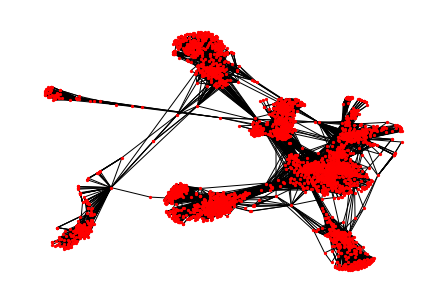

In [21]:
G = nx.read_edgelist ( "facebook_combined.txt" , create_using = nx.Graph() , nodetype = int ) # reading a real data
nx.draw_spring (G , node_color= 'red' , edge_color = 'black' , node_size = 5 ) # drawing the graph

iteration = 1000

initial_adjacency_mat = nx.to_numpy_matrix(G)

objlist = []

id = 0
for i in G :  #iterating in the graph containing 4039 nodes
    bi = accept_valid_opinion (random.uniform (0.0,1.0, None)) # initializing each nodes with a random opinion value
    #converting matrix to list by flatten function 
    arr = np.asarray(initial_adjacency_mat[id])
    node_connection = arr.flatten()
    id = id + 1
    objlist.append(user(id,bi,node_connection))

Here, We are introducing a new idea of spamming fake IDs upto level 2(in reference to tree) which is very common nowadays on any social media platform to make some particular opinions or ideas dominant all over the platform gradually or we can say just to put some biased opinion on the wall feed .  

In [22]:
# spamming logic
spammer_list = []
n = G.number_of_nodes()
n1 = n
y = int(n/100)

for i in range (y) :
            spam_node = random.randint(1, n)
            spammer_list.append(spam_node)
            length = len(spammer_list)

print("\nThe spamming nodes are: " , spammer_list)

for i in range(iteration) :

    if (i % 100 == 0) :

        for j in spammer_list :
            fake_id1 = n1+1
            fake_id2 = n1+2
            fake_id3 = n1+3
            fake_id4 = n1+4
            fake_id5 = n1+5
            fake_id6 = n1+6

            G.add_node(fake_id1)
            G.add_edge( j , fake_id1 )
            G.add_node(fake_id2)
            G.add_edge( j, fake_id2 )
            G.add_node( fake_id3 )
            G.add_edge( fake_id1 , fake_id3 )
            G.add_node( fake_id4 )
            G.add_edge( fake_id1 , fake_id4 )
            G.add_node( fake_id5 )
            G.add_edge( fake_id2 , fake_id5 )
            G.add_node( fake_id6 )
            G.add_edge( fake_id2 , fake_id6 ) 
            n1 = G.number_of_nodes()

print("\nnumber of generated spammers : " , length)
print("\nnumber of nodes before spamming :" , n)
print("\nnumber of nodes after spamming :" , n1)

updated_adjacency_mat = nx.to_numpy_matrix(G)

for i in range(n):  # iterating in the graph containing 4039 nodes + fake nodes
    # converting matrix to list by flatten function 
    new_arr = np.asarray(updated_adjacency_mat[i])
    new_node_connection = new_arr.flatten()
    objlist[i-1].neighbours_opinion = new_node_connection

j=0
for i in range (n,n1,6):
    new_arr = np.asarray(updated_adjacency_mat[i])
    new_node_connection = new_arr.flatten()
    if(j>length-1):
        j=0
    objlist.append(user(i+1,objlist [(spammer_list[j])-1].self_opinion,new_node_connection))
    objlist.append(user(i+2,objlist[(spammer_list[j])-1].self_opinion,new_node_connection))
    objlist.append(user(i+3,objlist[(spammer_list[j])-1].self_opinion,new_node_connection))
    objlist.append(user(i+4,objlist[(spammer_list[j])-1].self_opinion,new_node_connection))
    objlist.append(user(i+5,objlist[(spammer_list[j])-1].self_opinion,new_node_connection))
    objlist.append(user(i+6,objlist[(spammer_list[j])-1].self_opinion,new_node_connection))
    j=j+1


The spamming nodes are:  [3158, 2409, 3406, 1982, 3333, 1833, 2112, 268, 204, 932, 1106, 291, 3228, 3940, 724, 3055, 3393, 8, 1254, 2274, 955, 2854, 449, 1004, 1621, 209, 2941, 2873, 3101, 1443, 631, 3256, 2996, 138, 2271, 1852, 3578, 1558, 511, 2686]

number of generated spammers :  40

number of nodes before spamming : 4039

number of nodes after spamming : 6439


After spamming , biased individuals have increased in number and they are strongly holding the opinions of their producer nodes . 

Now , we are selecting one random actual user(not fake ID) from the network and
we are performing the proposed dynamics including transmission , distribution , attraction , repulsion and rewiring respectively starting from that particular node or individual in real life and calculating the probabilities according to the above functions .  

In [23]:
l1 = [] # list consisting of x values (difference between the post's and selected individual's opinion)
l2 = [] # list consisting of pt(x) values
l3 = [] # list consisting of x values (difference between the individual's and its neigbour's opinion)
l4 = [] # list consisting of pd(x) values
l5 = [] # list consisting of x values (difference between the neigbour's and individual's opinion)
l6 = [] # list consisting of prew(x) values

phi = 0 # real no. controlling the starting point of the cosine squared function
delta= 0.1 # delta is a real no. which becomes positive if  θ > bj and becomes negative if  θ < bj

for i in range(iteration) : # n times iteration to get a promising plot
    
    selected_node_value = random.randint(1, 4039)

    print("The selected node: ", objlist[selected_node_value - 1].user_id)
    print("The opinion of the selected node: ", objlist[selected_node_value - 1].self_opinion)
    print("The connection of the selected node to its adjacent nodes is given by : ", objlist[selected_node_value - 1].neighbours_opinion)

    listbj = [] #list containing the id of the neighbouring nodes of the selected node
    
    k=0  # counter for increamenting the index 
    for x in objlist[selected_node_value - 1].neighbours_opinion :
        if(x==1) :
            #print("The opinions of the neigbouring nodes are bj :", objlist[k].self_opinion) 
            listbj.append(objlist[k].user_id)
        k = k + 1
    
    #print("list containing the id of the neighbouring nodes of the selected node: ",listbj)

    theta = random.uniform (-1 , 1) # --> post opinion
    m = round(abs(theta - objlist[selected_node_value - 1].self_opinion) , 4 )
    print("The value of the main diff is :", m)
    l1.append(m)
    t = transmission_function(m)
    l2.append(t)
    print("The result of the transmission function for the selected node:", t)

    if (m <= 1) :  # condition to check if the post is transmitted or not
        for i in listbj : 
            #print("The initial i values are :", objlist[i-1].self_opinion)
            n = abs(objlist[selected_node_value - 1].self_opinion - objlist[i-1].self_opinion)
            l3.append(n)
            d = distribution_function( n , phi)
            l4.append(d)
            
            if (d >= 0.1) : # condition to check if the post is distributed or not 
                
                p1 = round(abs(theta - objlist[i-1].self_opinion),4)
                att = attraction_prob_function(p1)
                print("The result of the attraction prob func is :", att)
                
                if (p1 <= 1) : # condition to check if the particular neighbour is attracted or repulsed
                    objlist[i-1].self_opinion = objlist[i-1].self_opinion + delta # increamenting the opinion by delta value (0.1) 
                    for k in range(len(objlist[selected_node_value - 1].neighbours_opinion)) :
                        if(k == i-1):
                            objlist[selected_node_value - 1].neighbours_opinion[k] == 1.0

                else :
                    objlist[i-1].self_opinion = objlist[i-1].self_opinion - delta # decreamenting the opinion by delta value (0.1)
                    q = abs(objlist[i-1].self_opinion - objlist[selected_node_value - 1].self_opinion)
                    l5.append(q)
                    r = rewire(q)
                    l6.append(r)
                    for k in range(len(objlist[selected_node_value - 1].neighbours_opinion)) :
                        if(k == i-1):
                            objlist[selected_node_value - 1].neighbours_opinion[k] == 0.0

Streaming output truncated to the last 5000 lines.
The result of the attraction prob func is : 0.32275
The selected node:  1846
The opinion of the selected node:  0.6729491241172596
The connection of the selected node to its adjacent nodes is given by :  [0. 0. 0. ... 0. 0. 0.]
The value of the main diff is : 0.0045
The result of the transmission function for the selected node: 0.9999500359598766
The result of the attraction prob func is : 0.7589
The result of the attraction prob func is : 0.8382499999999999
The result of the attraction prob func is : 0.8742
The result of the attraction prob func is : 0.80205
The result of the attraction prob func is : 0.76985
The result of the attraction prob func is : 0.80295
The result of the attraction prob func is : 0.98725
The result of the attraction prob func is : 0.7319
The result of the attraction prob func is : 0.95395
The result of the attraction prob func is : 0.91665
The result of the attraction prob func is : 0.81045
The result of the at

Now , We are plotting probability values of post transmission , post distribution and rewiring versus the value of x which is the difference between the opinion values of different individuals calculated according to the proposed dynamics .

We denoted the respective probabilities by short forms : pt(x) , pd(x) and prew(x).

 Here , (i) The blue curve represents the pt(x) vs x plot.
        (ii) The orange curve represents the pd(x) vs x plot.
        (iii) The green curve represents the prew(x) vs x plot.


The pt(x),pd(x),prew(x) vs x plotted graph is given below :






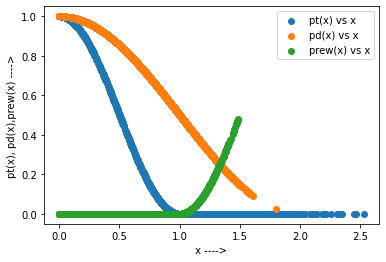

In [24]:
print("The pt(x),pd(x),prew(x) vs x plotted graph is given below :")

plt.xlabel(" x ----> ")
plt.ylabel(" pt(x) ---->")
plt.scatter(l1 , l2, label='pt(x) vs x')
print("\n")

plt.xlabel(" x ----> ")
plt.ylabel(" pd(x) ---->")
plt.scatter(l3 , l4, label='pd(x) vs x')
print("\n")

plt.xlabel(" x ----> ")
plt.ylabel("pt(x), pd(x),prew(x) ---->")
plt.scatter(l5 , l6, label='prew(x) vs x')
plt.legend()
plt.show()

At last , when we got our final updated adjacency matrix after rewiring and  values of different opinions after attraction and as well as repulsion we are drawing a density plot considering the opinion values of each individuals and the average value of the opinions of their corresponding neighbouring nodes (individuals) to check if after a period of time all the individuals converged into same sort of opinions because of the long period of time and biased fake IDs.

The density map of the above analysis is given below : 



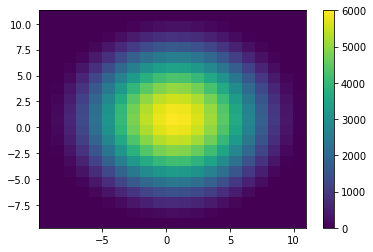

In [25]:
final_self_opinion_list = []
final_nei_avg_opinion_list = []

for i in range(n1) :
    final_self_opinion_list.append(objlist[i].self_opinion)
    c = 0
    k = 0
    summ = 0
    for j in objlist[i].neighbours_opinion:
        if(j==1) :
            c=c+1
            summ = summ + objlist[k].self_opinion
        k=k+1   
    avg = summ/c
    final_nei_avg_opinion_list.append(avg)

#DEFINE GRID SIZE AND RADIUS(h)

grid_size = 1
h = 10

#GETTING X,Y MIN AND MAX
x_min = min(final_self_opinion_list)
x_max = max(final_self_opinion_list)
y_min = min(final_nei_avg_opinion_list)
y_max = max(final_nei_avg_opinion_list)

#CONSTRUCT GRID
x_grid = np.arange(x_min-h,x_max+h,grid_size)
y_grid = np.arange(y_min-h,y_max+h,grid_size)
x_mesh,y_mesh = np.meshgrid(x_grid,y_grid)

#GRID CENTER POINT
xc = x_mesh+(grid_size/2)
yc = y_mesh+(grid_size/2)

#FUNCTION TO CALCULATE INTENSITY WITH QUARTIC KERNEL
def kde_quartic(d,h):
    dn=d/h
    P=(15/16)*(1-dn**2)**2
    return P

#processing
intensity_list=[]
for j in range(len(xc)):
    intensity_row=[]
    for k in range(len(xc[0])):
        kde_value_list=[]
        for i in range(len(final_self_opinion_list)):

            #Calculating DISTANCE

            d=math.sqrt((xc[j][k]-final_self_opinion_list[i])**2+(yc[j][k]-final_nei_avg_opinion_list[i])**2) 
            if d<=h:
                p=kde_quartic(d,h)
            else:
                p=0
            kde_value_list.append(p)
         # All intensity values
        p_total=sum(kde_value_list)
        intensity_row.append(p_total)
    intensity_list.append(intensity_row)

print("The density map of the above analysis is given below : \n")
# Density mapping plots     
intensity=np.array(intensity_list)
plt.pcolormesh(x_mesh,y_mesh,intensity)
#plt.plot(final_self_opinion_list,final_nei_avg_opinion_list,'ro')
plt.colorbar()
plt.show()

Here , We are calculating bimodality constant value with the values of skewness and kurtosis respectively and  introducing a balance value which is calculated . 

Finally , we are drawing the final network after spamming and rewiring .

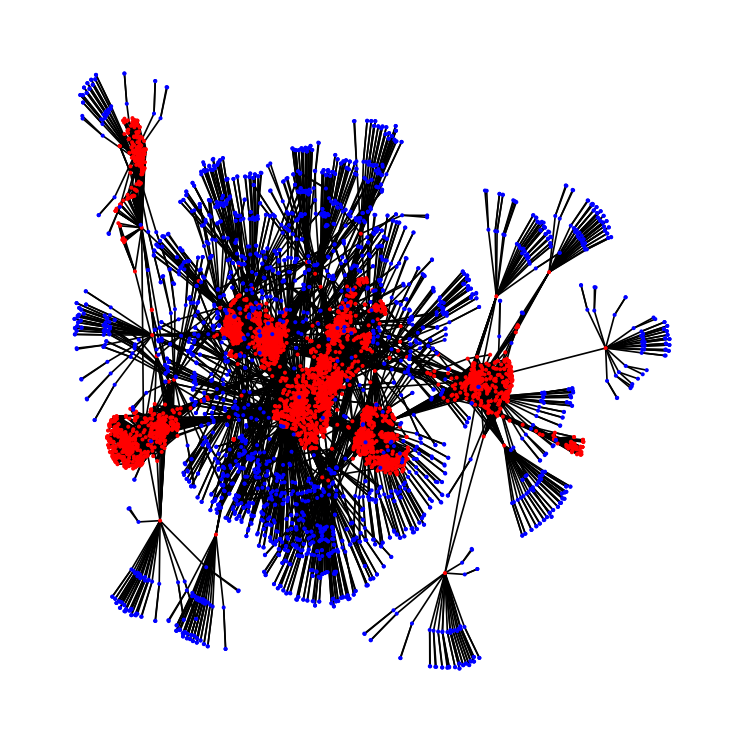

In [26]:
color_map = []
color_map = []
for i in G :
  if (i > 4039) :
    node_color = 'blue'
    color_map.append(node_color)
  else :
    node_color = 'red'
    color_map.append(node_color)
fig = plt.figure(1 , figsize=(6,6) , dpi=120)
nx.draw_spring (G , node_color = color_map , edge_color = 'black' , node_size = 2 ) # drawing the graph